Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Animation

## Contents

#### Animation
#### Saving Animations
#### Plotting live data

### Animation

Animation is the technique of rapidly displaying still images to generate the illusion of movement. This is known as frame-based animation. Frames are individual pictures in a sequence of images, so a sequence of frames or images makes an animation. The number of frames in a single second of animation is called frames per second (fps) or frame rate. When 24 frames(images) per second are shown in a sequence, the human eye perceives the animation as motion. Larger the number of frames played per second, smoother the animation will appear, but this will increase the file size.




In this tutorial, we will learn how to create animations using Matplotlib. The Animation package in Matplotlib defines classes for creating animations. The Animation class is the base class and it contains three subclasses - TimedAnimation, FuncAnimation and ArtistAnimation. In this tutorial, we will discuss how to make animations using the Funcanimation class. A sequence of plots are stitched together to make an animation, let us see an example below.

<IPython.core.display.Javascript object>


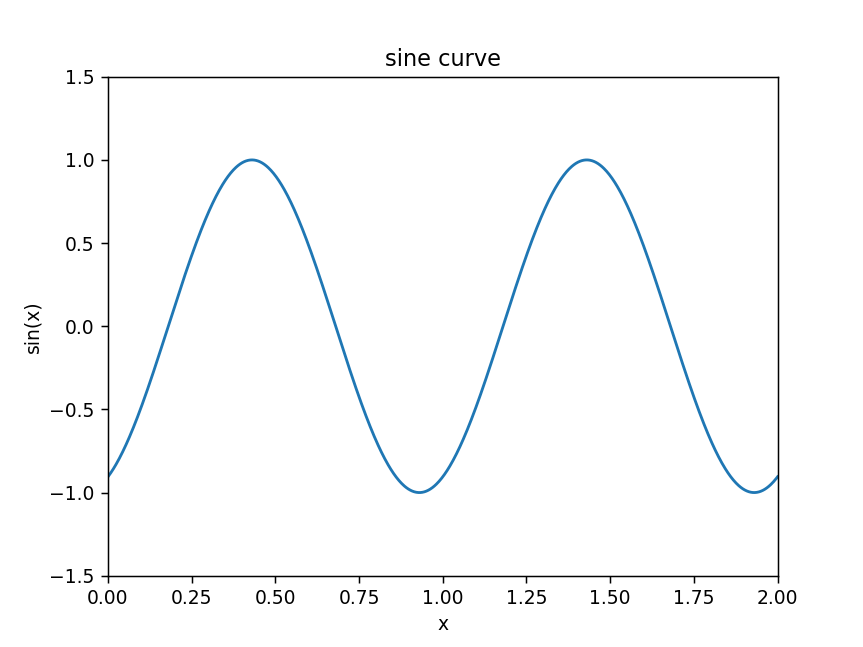

In [134]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

fig1 = plt.figure()
ax1 = plt.subplot(111)
line1,  = ax1.plot([],[])
ax1.set_xlim(0,2)
ax1.set_ylim(-1.5,1.5)
x = np.linspace(0,2,1000)

def init():
    ax1.set_xlabel('x')
    ax1.set_ylabel('sin(x)')
    ax1.set_title('sine curve')
    line1.set_data([],[])
    return line1,

def animate(i):
    y = np.sin(2 * np.pi * (x -  0.01*i))
    line1.set_data(x,y)
    return line1,

anim1 = animation.FuncAnimation(fig1,animate,init_func=init,frames=100,interval=100)

plt.show()

Let us go through the above code.

1. We begin by importing the necessary modules. 


2. Create a figure object and an axes object inside this figure.


3. Call the plot function to render a line plot. Notice that we have passed empty lists to the plot function. A 2D line  object gets created (line1,) and this line object is an empty line since it has no data points to join. So the figure gets initialized with a blank plot.


4. The axes limits are set and the input dataset 'x' is defined as a numpy array.


5. init function -- The init function is called for defining the background plot in the animation and it is used to draw a clear frame once before the first frame. If the function is not defined, the results of drawing from the first item in the frames sequence will be used. We can set elements that remain constant in a plot such as the axes limits, labels, title etc., in the init function as per requirement. This function must return a list Line2D objects. This function is passed to animation.funcanimation constructor via parameter init_func. 


6. animate function -- The animate function controls the plot for every frame in the animation and it is repeatedly called using the frame counter(i) to generate frame i of the animation. The frame counter is automatically passed and need not be specified explicitly. The animate function is called for each new frame and the function returns the elements in the plot which have been changed and these elements will be redrawn on the plot. This function is passed to the animation.FuncAnimation constructor. 


7. set_data method -- provides input data (x,y coordinates) to the line object, for each frame i the line object gets updated with new data. So instead of creating a new line object for each frame, a single line object is updated with different data for each frame by the set_data method.


8. An instance (anim1) of the FuncAnimation class is created. Figure object, animate() and init() functions are passed to this class as parameters. The animate function is repeatedly called at each frame in order to create an animation.

  Other parameters:

  interval -- specifies the delay between frames in milliseconds. Default value is 200.

  frames -- iterable, int, generator function, or None, optional
  Source of data to pass animate function and each frame of the animation

  repeat -- bool, optional
  Controls whether the animation should repeat when the sequence of frames is completed. Default value is True.

  


### Saving animations

Matplotlib allows to save animations in different video formats using a video encoder. A video encoder stitches together frames/images and creates a video of the specified format. Matplotlib does not provide any built-in video encoders, but it supports several third-party encoders. 

FFmpeg is a free and open-source software which can be used from command line, it is a tool for quickly changing an AV file format or quality, extracting audio, creating GIFs etc., 

In this tutorial, we will use the FFmpeg video encoder to save animations as a video. This requires the FFmpeg software to be installed on your system. To download the software go to the url - https://www.ffmpeg.org/download.html .
To install the software go to the url - https://m.wikihow.com/Install-FFmpeg-on-Windows.

In order to check if FFmpeg is installed on your system, open the terminal window and run the ffmpeg command. If it is installed, you will see some diagnostic information.

In the example below, the animation is saved in mp4 format by calling the save method on the FuncAnimation object.

<IPython.core.display.Javascript object>


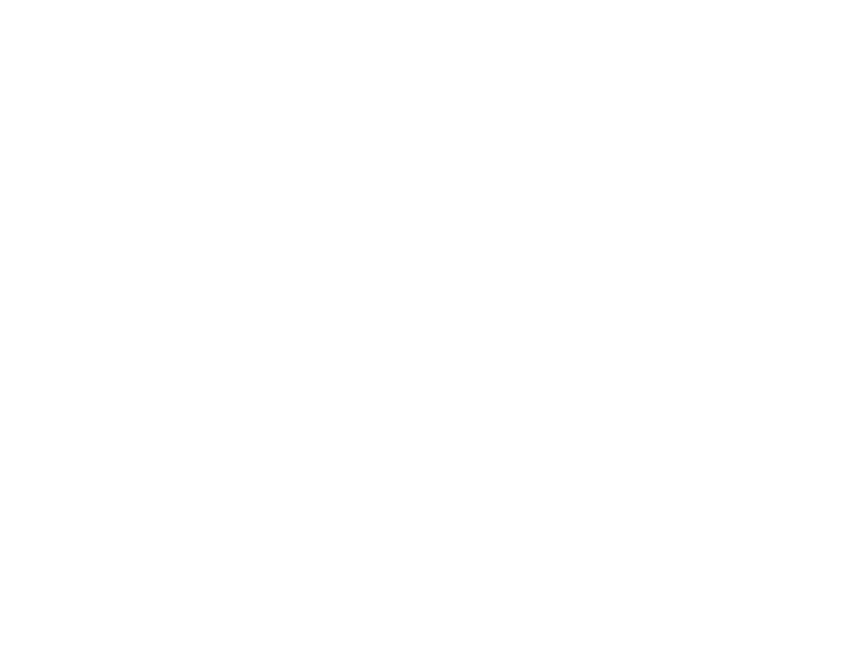

In [131]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
plt.rcParams['animation.ffmpeg_path'] = (r'C:\Users\Ajay Tech\ffmpeg\ffmpeg\bin\ffmpeg.exe')

fig2 = plt.figure() 
ax2 = plt.axes(xlim=(-40, 40), ylim=(-40, 40)) 
line2, = ax2.plot([], [], lw=2) 
xdata, ydata = [], [] 


def init(): 
    line2.set_data([], []) 
    plt.title('A growing coil') 
    return line2, 

def animate(i): 
    t = 0.1*i 
    x = t*np.sin(t) 
    y = t*np.cos(t) 
    xdata.append(x) 
    ydata.append(y) 
    line2.set_data(xdata, ydata) 
    return line2, 

anim2 = animation.FuncAnimation(fig2, animate, init_func=init,frames=500, interval=20, blit=True) 
FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim2.save('coil.mp4',writer=FFwriter)
plt.close()

<img src="./images/coil.gif"/>

### Plotting live data

In the next example, we will see how to plot real-time data in Matplotlib. The code below reads a text file and plots the data as and when data gets updated into the file. Each row in the text file contains two columns separated by a comma. In the animate function the entire file is first read into a list of lines. Each element in this list is a string object. Using a for loop we iterate over the list and split each element with the split(',') method on the comma delimiter. The first column is appended to the list x, second column is appended to list y denoting the x and y coordinates respectively.

For demo purpose, we manually update the text file with new records and save. The script accesses the text file in read mode and if a new data record is found, lists x and y are updated and are passed as arguments to plot function to render plot with new data points.

An instance of the FuncAnimation class is created by passing fig3 and animate function. The animate function is repeatedly called at each frame in order to create an animation.

<IPython.core.display.Javascript object>


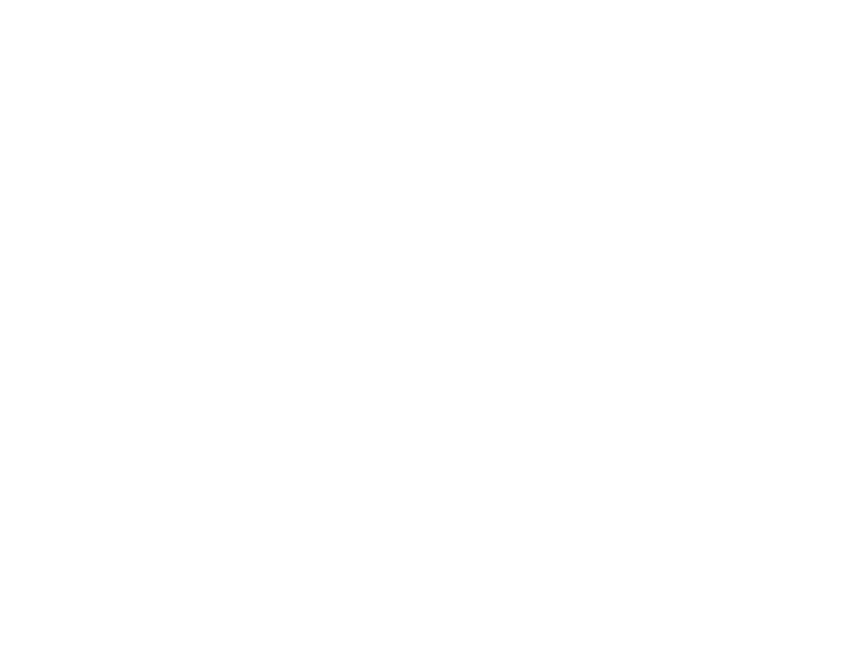

In [124]:
fig3 = plt.figure() 
ax3 = plt.axes() 
ax3.set_xlim(0,20)
ax3.set_ylim(0,10)

def animate(i):
    x = []
    y = []

    f = open(r'C:\Users\Ajay Tech\Documents\training\visualization\Data\Sample.txt','r')
    lines = f.read().split('\n')
    
    for line in lines:
        if len(line)> 1:   
            x1,y1 = line.split(',')
            x.append(float(x1))
            y.append(float(y1))
    ax3.clear()
    ax3.plot(x,y,marker='o')
           
anim3 = animation.FuncAnimation(fig3,animate, interval=1000)
FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim3.save('live_data.mp4',writer=FFwriter)
plt.close()

<img src="./images/live_data.gif"/>